In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [11]:
#loading MNIST data
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [12]:
#Converting it into 3D
x_train = x_train.reshape((60000,28,28)).astype('float32')/255
x_test = x_test.reshape(10000,28,28).astype('float32')/255

Label: 4


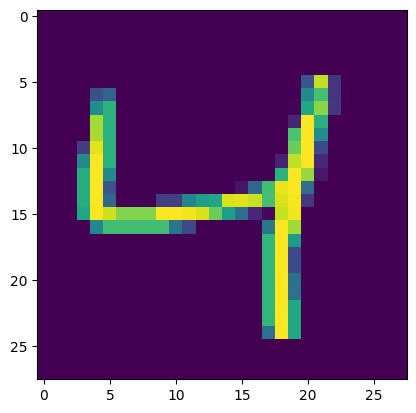

In [13]:
#displaying the image
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
print("Label:",y_train[2])
plt.show()

In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LSTM

#Building LSTM Model
inputs = Input(shape=(28,28))
layer = LSTM(128)(inputs)
outputs = Dense(10,activation='softmax')(layer)
model = Model(inputs = inputs, outputs=outputs)

In [15]:
#Model Compiling
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
#Model Fitting
history = model.fit(x_train,to_categorical(y_train),epochs=10,batch_size=128,validation_split=0.1)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6309 - loss: 1.0827 - val_accuracy: 0.9178 - val_loss: 0.2503
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9315 - loss: 0.2184 - val_accuracy: 0.9352 - val_loss: 0.2058
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9618 - loss: 0.1305 - val_accuracy: 0.9637 - val_loss: 0.1212
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9711 - loss: 0.0927 - val_accuracy: 0.9818 - val_loss: 0.0659
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9788 - loss: 0.0705 - val_accuracy: 0.9795 - val_loss: 0.0716
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9818 - loss: 0.0569 - val_accuracy: 0.9830 - val_loss: 0.0599
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9857 - loss: 0.0457 - val_accuracy: 0.9803 - val_loss: 0.0647
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9874 - loss: 0.0410 - val_accuracy: 0.

In [17]:
#Model Evaluation
test_loss, test_acc = model.evaluate(x_test,to_categorical(y_test))
print("Test Accuracy", test_acc)
print("Test Loss", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9793 - loss: 0.0702
Test Accuracy 0.9842000007629395
Test Loss 0.052577052265405655


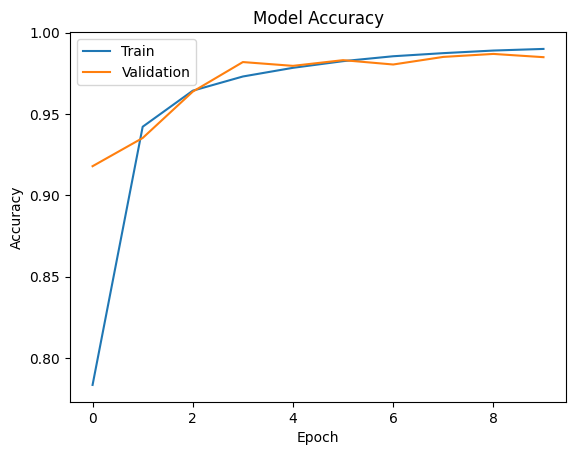

In [22]:
#Graph accuracy v/s Validation Accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

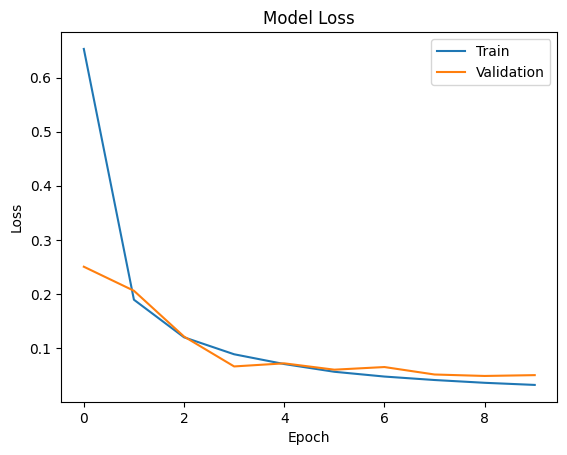

In [23]:
#Graph : Loss v/s Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

In [25]:
#prediction
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


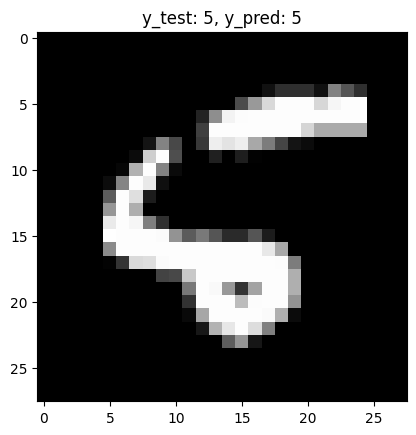

In [38]:
import numpy as np
index = np.where(y_test == 5)[0][0]

label = y_test[index]
pred = y_pred[index]

import matplotlib.pyplot as plt
plt.imshow(x_test[index], cmap='gray')
plt.title(f"y_test: {label}, y_pred: {pred}")
plt.show()